In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [81]:
# Загрузка набора данных
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Сорта:", iris.target_names)
print("Метки классов:", iris.target[:100])  # первые 100
df.head()

Сорта: ['setosa' 'versicolor' 'virginica']
Метки классов: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


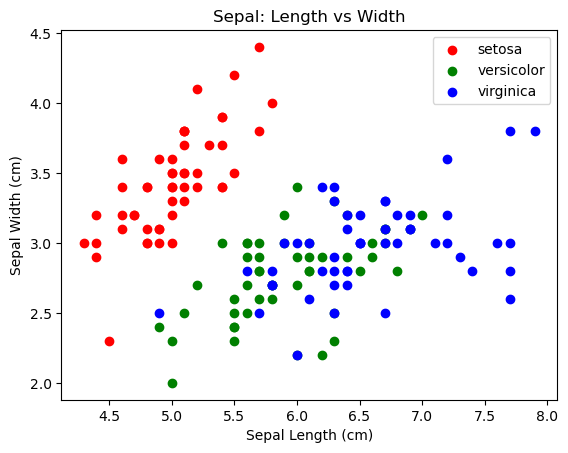

In [82]:
# п1
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df[df['target'] == i]['sepal length (cm)'], df[df['target'] == i]['sepal width (cm)'], color=colors[i], label=iris.target_names[i])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal: Length vs Width')
plt.legend()
plt.show()

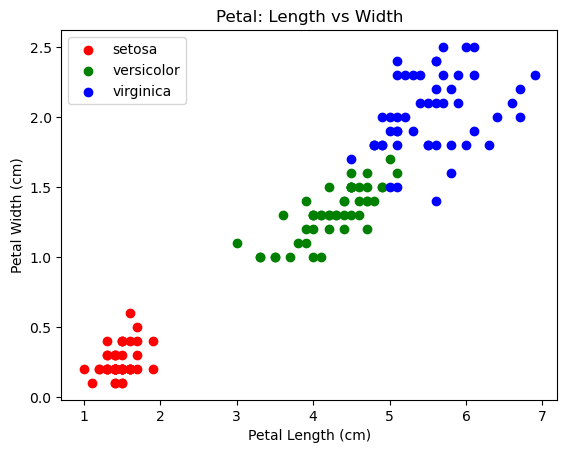

In [83]:
for i in range(3):
    plt.scatter(df[df['target'] == i]['petal length (cm)'], df[df['target'] == i]['petal width (cm)'],
                color=colors[i], label=iris.target_names[i])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal: Length vs Width')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

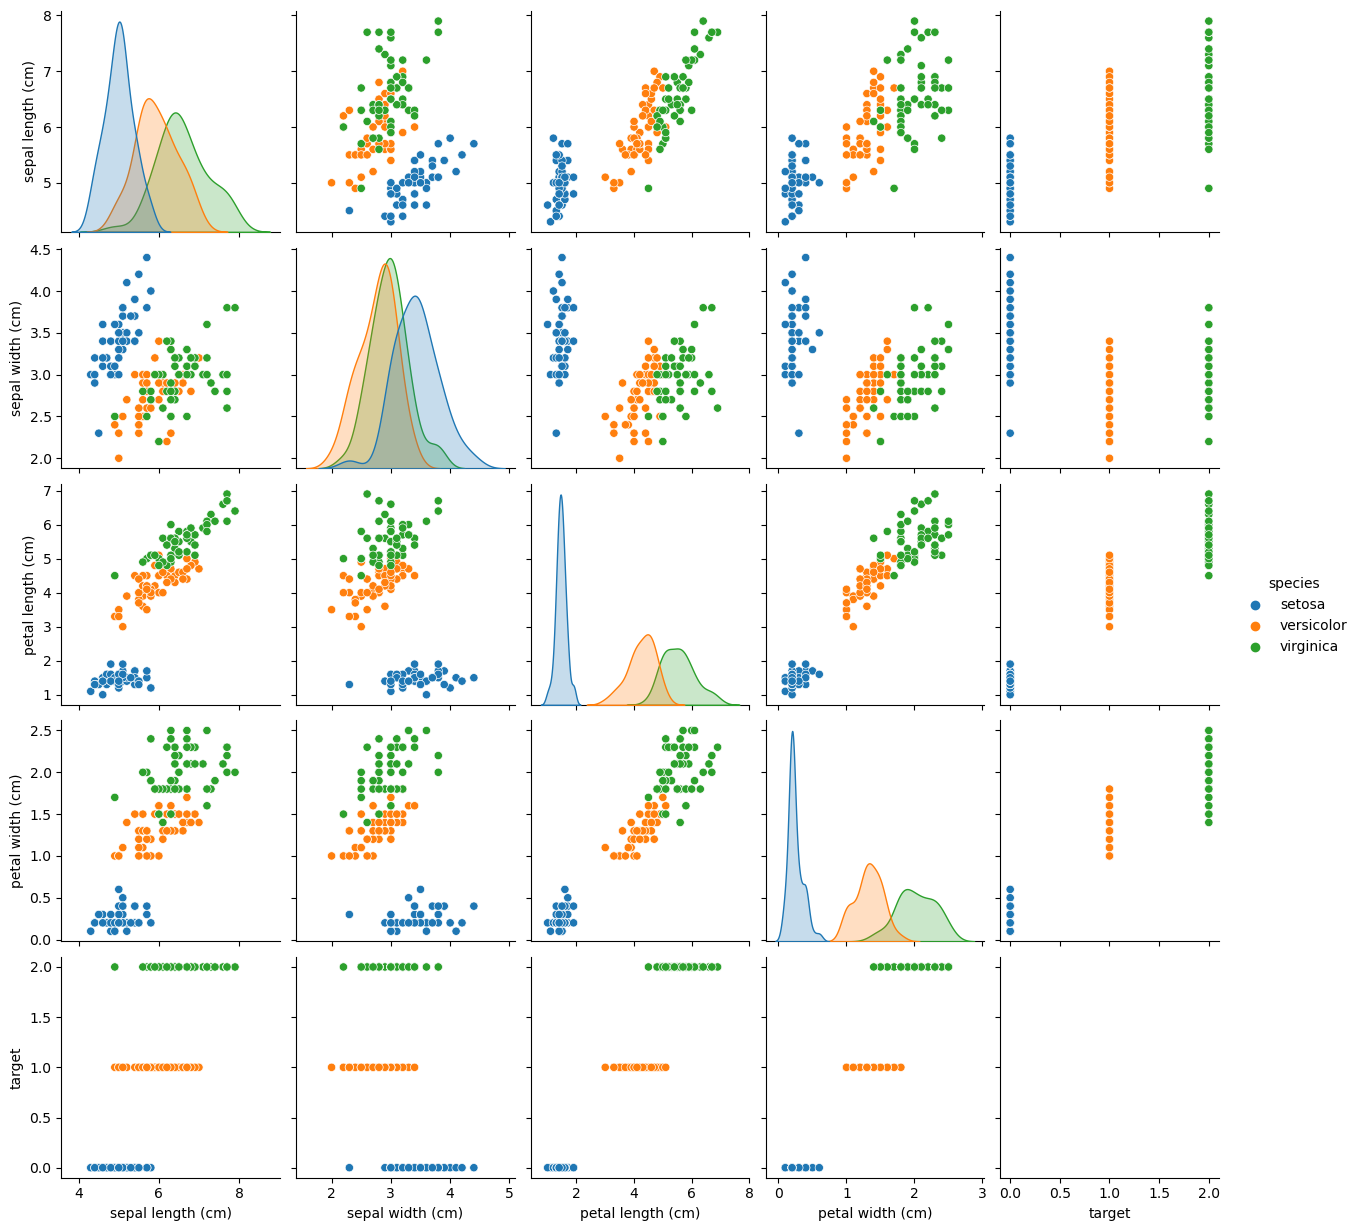

In [84]:
# п2
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
sns.pairplot(df, hue='species')
plt.show()

In [85]:
# п3
# setosa и versicolor
df1 = df[df['target'].isin([0, 1])]

# versicolor и virginica
df2 = df[df['target'].isin([1, 2])]

In [86]:
#п4-п8
def train_and_evaluate(df_subset):
    X = df_subset[iris.feature_names]
    y = df_subset['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    print("Accuracy:", score)

In [87]:
print("Модель 1: Setosa vs Versicolor")
train_and_evaluate(df1)

print("\nМодель 2: Versicolor vs Virginica")
train_and_evaluate(df2)

Модель 1: Setosa vs Versicolor
Accuracy: 1.0

Модель 2: Versicolor vs Virginica
Accuracy: 0.9333333333333333


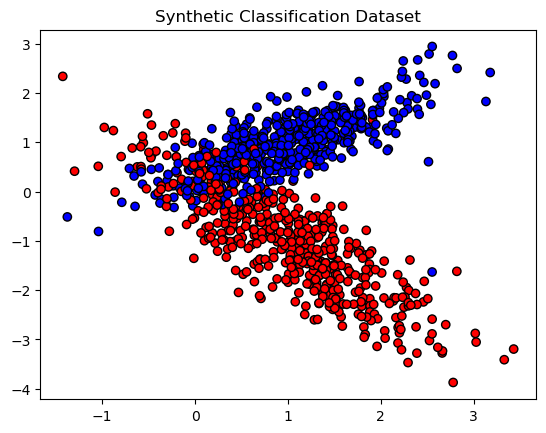

In [88]:
# п9, генерация
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Synthetic Classification Dataset")
plt.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print("Synthetic Dataset Accuracy:", accuracy_score(y_test, preds))

Synthetic Dataset Accuracy: 0.9366666666666666
